In [1]:
import numpy as np   
import matplotlib.pyplot as plot
%matplotlib inline

# Ambient state

In [2]:
from pycfd.reference.atmospheric_flow import stratification_profiles, saturation_calculation

ambient_stratification = stratification_profiles.Soong1973Dry()

T_e = lambda z: ambient_stratification.temp(z)
p_e = ambient_stratification.p

# Model integration

In [3]:
import odespy, numpy
from pyclouds import cloud_equations, plotting, cloud_microphysics
from pyclouds.common import Var

In [4]:
g = ambient_stratification.g
R_d = ambient_stratification.gas_properties.R()
cp_d = ambient_stratification.gas_properties.cp()

environment = ambient_stratification
constants = {'R_d': R_d, 'cp_d': cp_d, 'g': g }

In [5]:
z0 = 750.
z_points = numpy.linspace(z0, 10e3, 5000)

w0 = 2.0
r0 = 100.
T0 = ambient_stratification.temp(z0) + 0.1
p0 = ambient_stratification.p(z0)
# r, w, T, q_v, q_r, q_l, q_i
initial_condition = Var.make_state(r=r0, w=w0, T=T0, q_v=0.012, q_l=0.0, q_i=0.0, p=p0)

In [6]:
beta = 0.2

SolverClass = odespy.Euler

microphysics = cloud_microphysics.FiniteCondensationTimeMicrophysics(model_constraint='isobaric', disable_rain=False)
cloud_model = cloud_equations.FullThermodynamicsCloudEquations(environment=environment, gamma=1.0, D=0.1, beta=beta, microphysics=microphysics)
profile1 = cloud_model.integrate(initial_condition, z_points, SolverClass=SolverClass)

microphysics = cloud_microphysics.FiniteCondensationTimeMicrophysics(model_constraint='isobaric', disable_rain=True)
cloud_model = cloud_equations.FullThermodynamicsCloudEquations(environment=environment, gamma=1.0, D=0.1, beta=beta, microphysics=microphysics)
profile2 = cloud_model.integrate(initial_condition, z_points, SolverClass=SolverClass)


microphysics = cloud_microphysics.FiniteCondensationTimeMicrophysics(model_constraint='isobaric', disable_rain_condevap=True)
cloud_model = cloud_equations.FullThermodynamicsCloudEquations(environment=environment, gamma=1.0, D=0.1, beta=beta, microphysics=microphysics)
profile3 = cloud_model.integrate(initial_condition, z_points, SolverClass=SolverClass)




Integration stopped: solution became nan
ForwardEuler terminated at t=984.997
Integration stopped: solution became nan
Integration stopped: vertical velocity dropped to zero
-0.104439870915
ForwardEuler terminated at t=1103.42
Integration stopped: vertical velocity dropped to zero
-0.104439870915
Integration stopped: vertical velocity dropped to zero
-1.21601514632
ForwardEuler terminated at t=1105.27
Integration stopped: vertical velocity dropped to zero
-1.21601514632


/home/zmaw/m300464/pytools/pyclouds/parameterisations.py:241: UserWarning: Using default value for a1_ice
  warnings.warn("Using default value for %s" % c_name)
/home/zmaw/m300464/pytools/pyclouds/parameterisations.py:241: UserWarning: Using default value for a0_ice
  warnings.warn("Using default value for %s" % c_name)
/home/zmaw/m300464/pytools/pyclouds/parameterisations.py:241: UserWarning: Using default value for b_K
  warnings.warn("Using default value for %s" % c_name)
/home/zmaw/m300464/pytools/pyclouds/parameterisations.py:241: UserWarning: Using default value for a_K
  warnings.warn("Using default value for %s" % c_name)
/home/zmaw/m300464/pytools/pyclouds/cloud_equations.py:599: UserWarning: It seems the environmental profile doesn't define a relative humidity so we'll assume it's dry
  warnings.warn("It seems the environmental profile doesn't define a relative humidity so we'll assume it's dry")
/home/zmaw/m300464/pytools/pyclouds/cloud_microphysics.py:226: UserWarning: EoS 

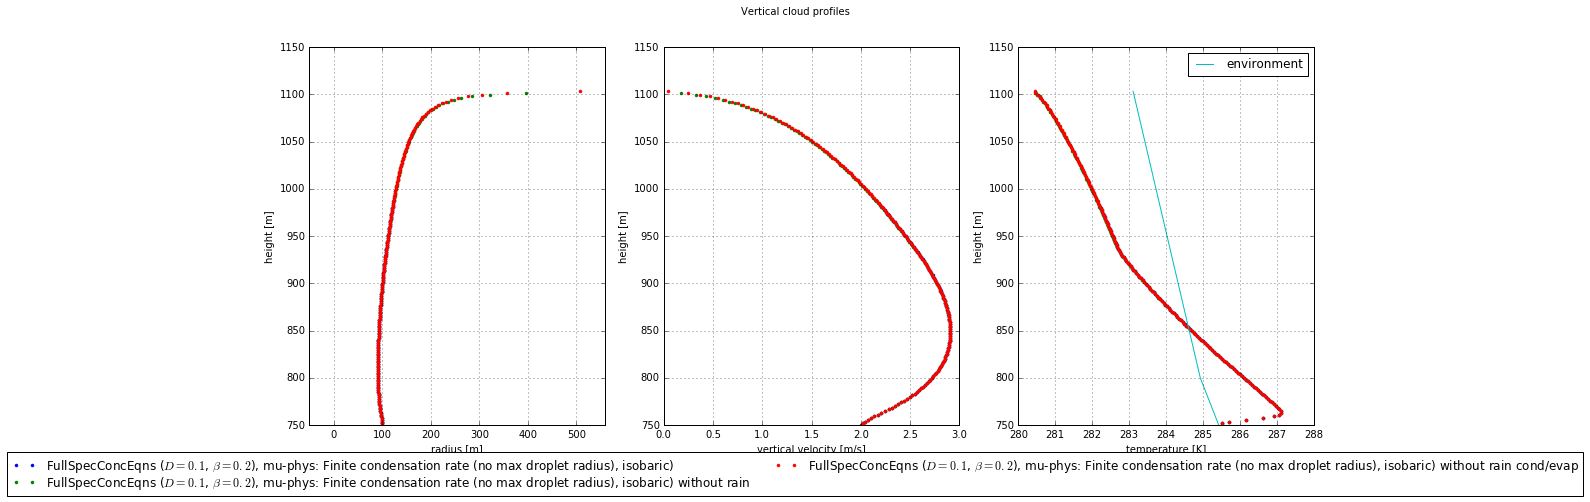

In [7]:
fig = plotting.plot_profiles([profile1, profile2, profile3], ['r', 'w', 'T'])
#fig.savefig('/home/zmaw/m300464/Desktop/cloudmodel_profile.pdf')

(0, 1)

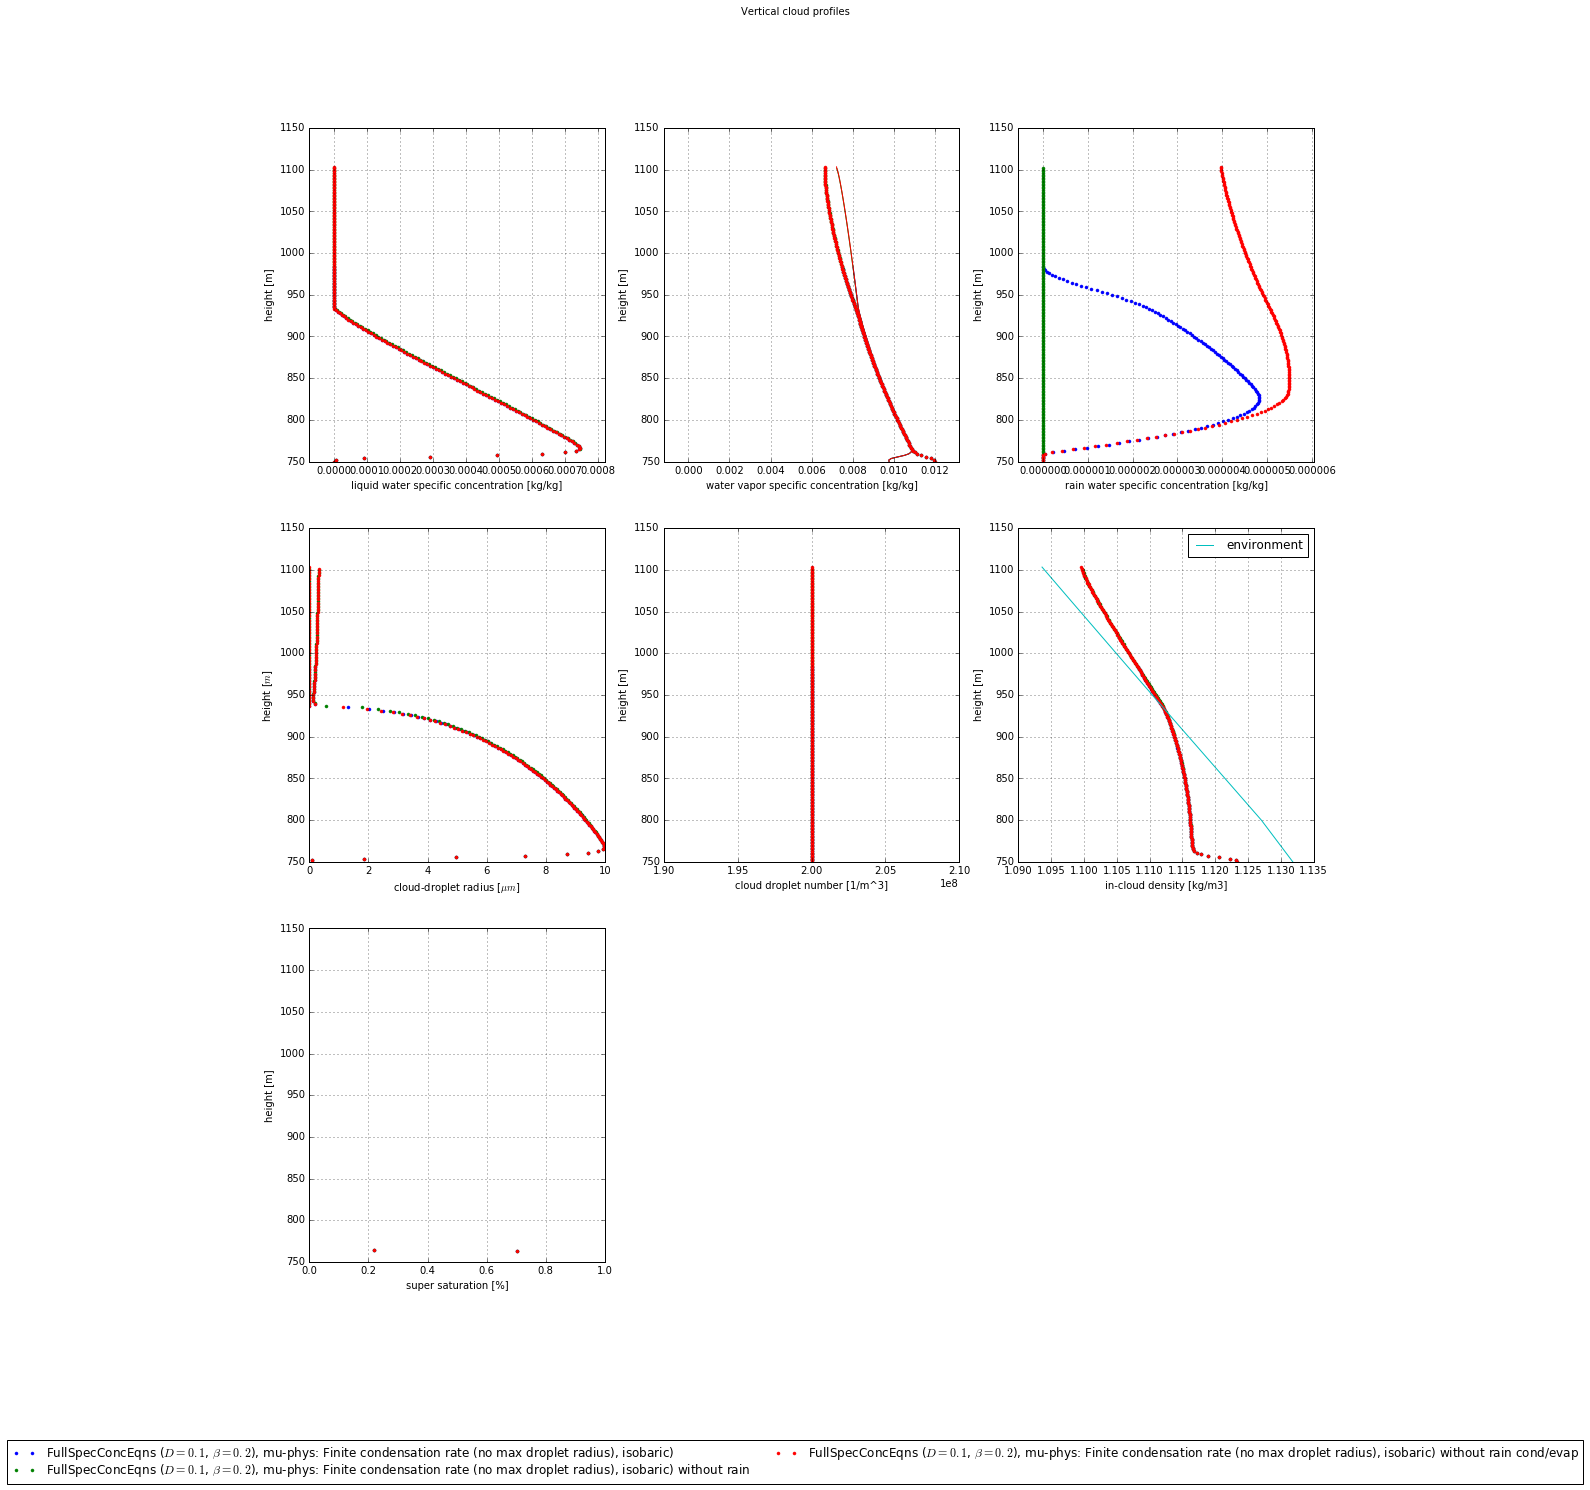

In [8]:
fig = plotting.plot_profiles([profile1, profile2, profile3], ['q_l', 'q_v', 'q_r', 'r_c', 'Nc', 'rho_c', 'Sw', ])
fig.gca().set_xlim(0,1)

(0, 2e-05)

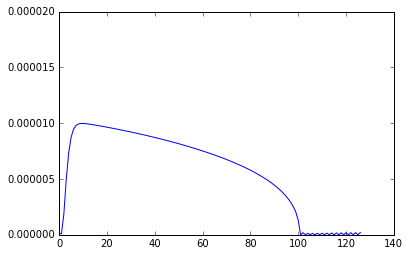

In [9]:
t_mphys = profile1.extra_vars['t_substeps']
r_c__mphys = profile1.extra_vars['r_c']

plot.plot(r_c__mphys)
plot.ylim(0, 2.0e-5)

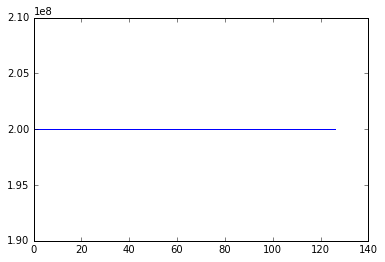

In [10]:
Nc__mphys = profile1.extra_vars['Nc']

plot.plot(Nc__mphys)

(750.0, 1083.1466293258652)

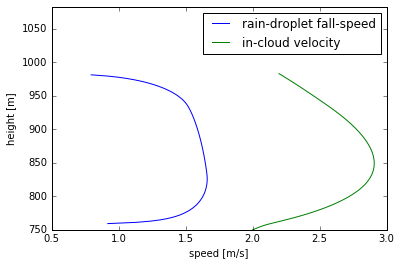

In [18]:
w_r__mphys = profile1.extra_vars['w_r']
z_mphys = profile1.extra_vars['t_substeps']

plot.plot(w_r__mphys, z_mphys, label='rain-droplet fall-speed')
plot.plot(profile1.F[:,Var.w], profile1.z, label='in-cloud velocity')
plot.legend()
plot.xlabel('speed [m/s]')
plot.ylabel('height [m]')
plot.ylim(None, profile1.z.max() + 100.)